In [1]:
from google.colab import files
uploaded = files.upload()


Saving dls_particle_size_data.csv to dls_particle_size_data.csv


In [2]:
import pandas as pd

# Load data
df = pd.read_csv('dls_particle_size_data.csv')
df.head()


,Material,DLS_Particle_Size_nm,Temperature_C
0,NanoPolymer_A,164.270209,27.099033
1,NanoPolymer_A,150.362226,26.386951
2,NanoPolymer_A,163.395078,25.089446
3,NanoPolymer_A,189.201685,24.029595
4,NanoPolymer_A,142.844880,26.047335


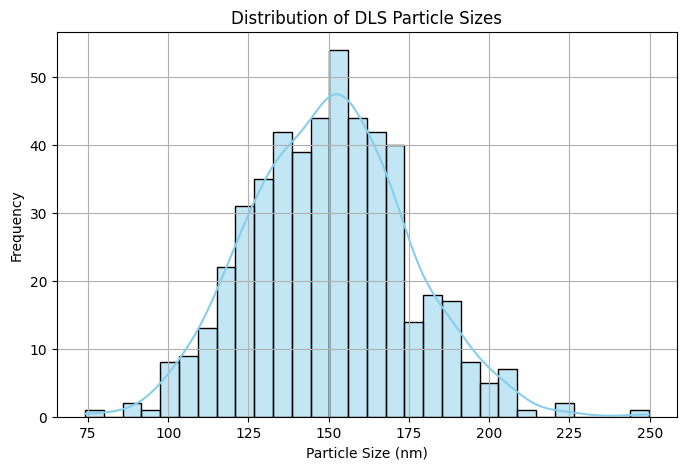

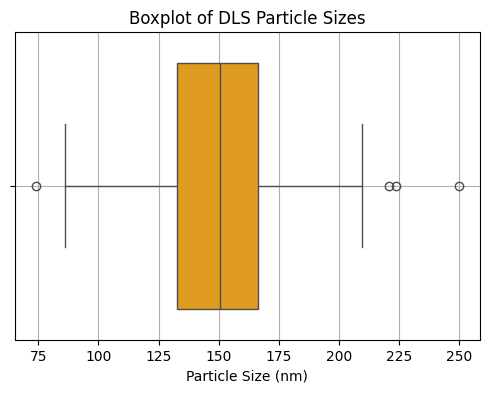

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of particle sizes
plt.figure(figsize=(8, 5))
sns.histplot(df['DLS_Particle_Size_nm'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of DLS Particle Sizes')
plt.xlabel('Particle Size (nm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of particle sizes
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['DLS_Particle_Size_nm'], color='orange')
plt.title('Boxplot of DLS Particle Sizes')
plt.xlabel('Particle Size (nm)')
plt.grid(True)
plt.show()


In [4]:
import statsmodels.api as sm

# Define variables
X = df['Temperature_C']
y = df['DLS_Particle_Size_nm']
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     DLS_Particle_Size_nm   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.344
Date:                  Thu, 16 Oct 2025   Prob (F-statistic):              0.247
Time:                          12:52:21   Log-Likelihood:                -2306.8
No. Observations:                   500   AIC:                             4618.
Df Residuals:                       498   BIC:                             4626.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           171.3055  

In [6]:
print(df.columns)


Index(['Material', 'DLS_Particle_Size_nm', 'Temperature_C', 'z_score'], dtype='object')


In [7]:
# Display outliers with only available columns
outliers_z[['DLS_Particle_Size_nm', 'z_score']]


,DLS_Particle_Size_nm,z_score
209,249.711200,4.070783
262,74.088486,-3.116052
478,223.804215,3.010617


In [8]:
outliers_z.reset_index()[['index', 'DLS_Particle_Size_nm', 'z_score']]


,index,DLS_Particle_Size_nm,z_score
0,209,249.711200,4.070783
1,262,74.088486,-3.116052
2,478,223.804215,3.010617


In [9]:
outliers_z = df[abs(df['z_score']) > 3]
print(f"Z-Score Outliers Found: {len(outliers_z)}")
outliers_z.reset_index()[['index', 'Material', 'DLS_Particle_Size_nm', 'z_score']]


Z-Score Outliers Found: 3


,index,Material,DLS_Particle_Size_nm,z_score
0,209,NanoPolymer_A,249.711200,4.070783
1,262,NanoPolymer_A,74.088486,-3.116052
2,478,NanoPolymer_A,223.804215,3.010617


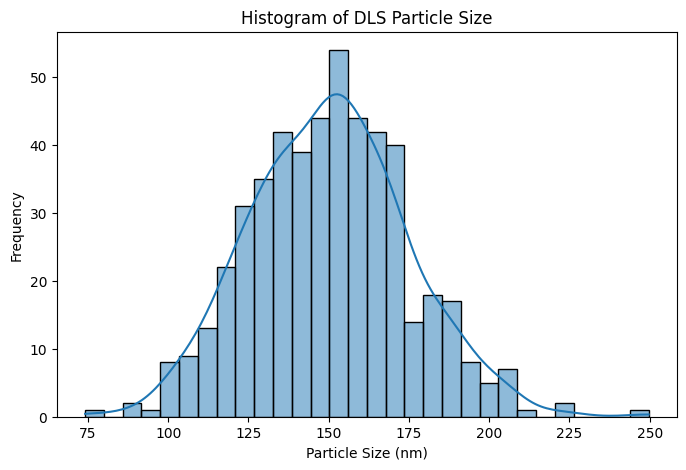

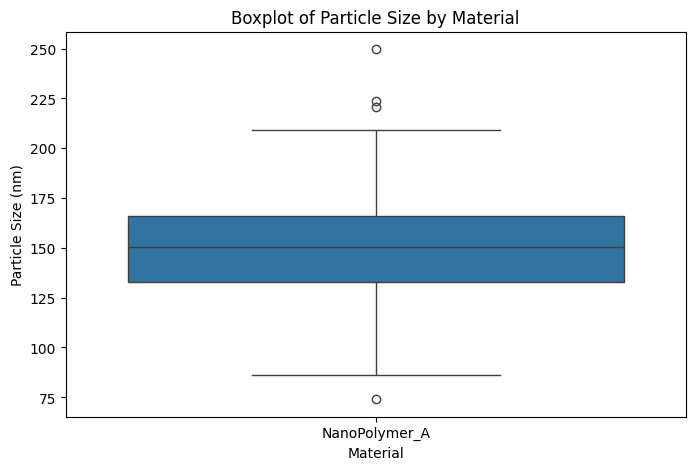

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of particle sizes
plt.figure(figsize=(8,5))
sns.histplot(df['DLS_Particle_Size_nm'], bins=30, kde=True)
plt.title('Histogram of DLS Particle Size')
plt.xlabel('Particle Size (nm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of particle sizes grouped by material (if multiple materials)
plt.figure(figsize=(8,5))
sns.boxplot(x='Material', y='DLS_Particle_Size_nm', data=df)
plt.title('Boxplot of Particle Size by Material')
plt.xlabel('Material')
plt.ylabel('Particle Size (nm)')
plt.show()


In [12]:
print(df['Material'].unique())
print(df['Material'].value_counts())


['NanoPolymer_A']
Material
NanoPolymer_A    500
Name: count, dtype: int64


In [13]:
df_clean = df.dropna(subset=['Material'])


count    500.000000
mean     150.234602
std       24.461200
min       74.088486
25%      132.860677
50%      150.362592
75%      166.119504
max      249.711200
Name: DLS_Particle_Size_nm, dtype: float64


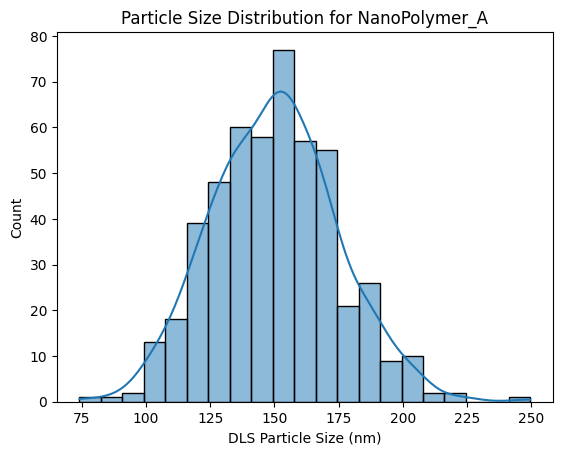

In [15]:
print(df['DLS_Particle_Size_nm'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['DLS_Particle_Size_nm'], kde=True)
plt.title('Particle Size Distribution for NanoPolymer_A')
plt.xlabel('DLS Particle Size (nm)')
plt.ylabel('Count')
plt.show()
